In [1]:
import cv2 as cv # 4.5.5
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import utils

assets_loaded = utils.load_test_assets()

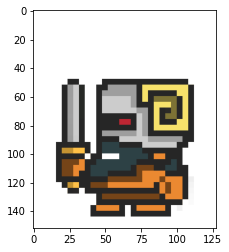

In [2]:
img = cv.imread(assets_loaded['monsters'][4], cv.IMREAD_UNCHANGED) # load image with alpha channel
img = utils.bgra2rgba(img)
img = utils.resize_image(img, 4)
plt.imshow(img)
plt.show()

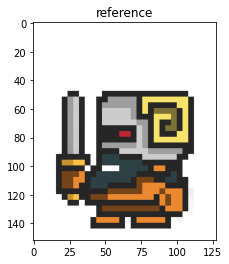

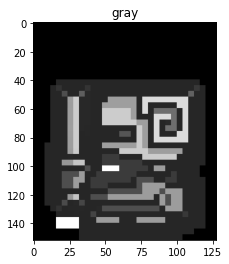

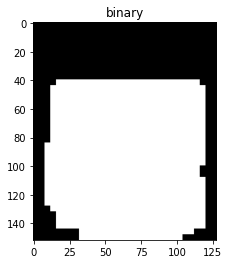

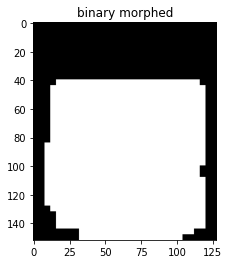

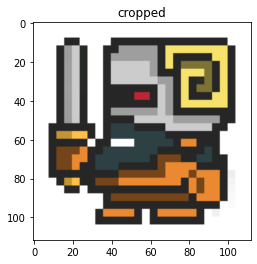

In [17]:
utils.plt_img(img, title='reference')

gray = cv.cvtColor(img, cv.COLOR_RGBA2GRAY)
utils.plt_img(gray, title='gray', cmap='gray')

thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY)[1]
utils.plt_img(thresh, title='binary', cmap='gray')

# Close and open morph to fill holes.
kernel = np.ones((3,3), np.uint8)
mask = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)
mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)
utils.plt_img(thresh, title='binary morphed', cmap='gray')

# Get contours to crop image
contours = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
cntr = contours[0]
x,y,w,h = cv.boundingRect(cntr)

# Crop image
crop = img[y:y+h, x:x+w]
utils.plt_img(crop, title='cropped', cmap='gray')